### Zillow Property Value Prediction — Phase 1: EDA

#### Business Understanding
**Objective:**  
Understand what factors drive property values and build a predictive regression model for `taxvaluedollarcnt`.  

**Business Use:**  
Results will help Zillow, real estate agents, and investors make better pricing and investment decisions.  

**Success Criteria:**  
- Technical: Model accuracy (RMSE, MAE, R²).  
- Business: Clear insights into key drivers of home values that can guide pricing and marketing.

**Goals for Phase 1: EDA**
- Load dataset  
- Inspect shape, dtypes, missing values  
- Handle missing values & outliers  
- Perform EDA with visuals  
- Write insights  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from urllib.parse import urlparse

# global plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)


### **1. Load Dataset**


In [ ]:
# URL of Zillow dataset
url = "https://www.cs.bu.edu/fac/snyder/cs505/Data/zillow_dataset.csv"

# Save file inside data/raw/
raw_dir = "../data/raw"
os.makedirs(raw_dir, exist_ok=True)

filename = os.path.join(raw_dir, os.path.basename(urlparse(url).path))

# Download if not exists
if not os.path.exists(filename):
    try:
        print("Downloading the file...")
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        with open(filename, "wb") as f:
            f.write(response.content)
        print("File downloaded successfully:", filename)
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")
else:
    print("File already exists. Skipping download.")

# Load into DataFrame
df = pd.read_csv(filename)
print("Dataset loaded with shape:", df.shape)
df.head()


File already exists. Skipping download.
Dataset loaded with shape: (77613, 55)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,assessmentyear,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,taxvaluedollarcnt
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,1998.0,NaN,NaN,2016.0,NaN,NaN,6.059063e+13,1023282.0
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,1967.0,1.0,NaN,2016.0,NaN,NaN,6.111001e+13,464000.0
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,NaN,1962.0,1.0,NaN,2016.0,NaN,NaN,6.059022e+13,564778.0
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,NaN,1970.0,NaN,NaN,2016.0,NaN,NaN,6.037300e+13,145143.0
4,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,NaN,1964.0,NaN,NaN,2016.0,NaN,NaN,6.037124e+13,119407.0


### **2. Basic Info**

In [7]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# Data types of each column
print("\nData Types:")
print(df.dtypes.value_counts())  # summary of how many int, float, object, etc.
print("\nFirst few columns' dtypes:")
print(df.dtypes.head(10))  # just a sample

# Peek at data
print("\nSample Data:")
display(df.head())

# General info (null counts, memory usage)
print("\nInfo:")
df.info()

# Basic statistics for numeric columns
print("\nDescriptive Statistics:")
display(df.describe().T)


Shape: (77613, 55)

Data Types:
float64    49
object      5
int64       1
Name: count, dtype: int64

First few columns' dtypes:
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
bathroomcnt                 float64
bedroomcnt                  float64
buildingclasstypeid         float64
buildingqualitytypeid       float64
calculatedbathnbr           float64
decktypeid                  float64
dtype: object

Sample Data:


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,assessmentyear,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,taxvaluedollarcnt
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,1998.0,NaN,NaN,2016.0,NaN,NaN,6.059063e+13,1023282.0
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,1967.0,1.0,NaN,2016.0,NaN,NaN,6.111001e+13,464000.0
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,NaN,1962.0,1.0,NaN,2016.0,NaN,NaN,6.059022e+13,564778.0
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,NaN,1970.0,NaN,NaN,2016.0,NaN,NaN,6.037300e+13,145143.0
4,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,NaN,1964.0,NaN,NaN,2016.0,NaN,NaN,6.037124e+13,119407.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   airconditioningtypeid         25007 non-null  float64
 2   architecturalstyletypeid      207 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77579 non-null  float64
 5   bedroomcnt                    77579 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49809 non-null  float64
 8   calculatedbathnbr             76963 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6037 non-null   float64
 11  calculatedfinishedsquarefeet  77378 non-null  float64
 12  finishedsquarefeet12          73923 non-null  float64

,count,mean,std,min,25%,50%,75%,max
parcelid,77613.0,1.300781e+07,3.518717e+06,1.071186e+07,1.153821e+07,1.253004e+07,1.421101e+07,1.676893e+08
airconditioningtypeid,25007.0,1.812013e+00,2.965768e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,207.0,7.386473e+00,2.728030e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03
bathroomcnt,77579.0,2.298496e+00,9.967317e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77579.0,3.053223e+00,1.140480e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,49809.0,6.533779e+00,1.722062e+00,1.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,76963.0,2.316392e+00,9.796893e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
decktypeid,614.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


- Dataset has **77,613 rows × 55 columns**.  
- Most features are **numeric (float64)**, with only 5 categorical (`object`) columns.  
- Target variable is the **`taxvaluedollarcnt`** (property tax-assessed value).  
- Several columns have **extremely high missing values**:
  - `basementsqft` (only 50 non-null)
  - `architecturalstyletypeid` (207 non-null)
  - `decktypeid` (614 non-null)
  - `taxdelinquencyyear` (2,900 non-null)
- Columns like `parcelid` are **identifiers** (not features).  
- Values range widely:
  - `bathroomcnt` and `bedroomcnt` are reasonable (mostly 1–6).  
  - `lotsizesquarefeet` and `finishedsquarefeet` show large variance and potential outliers.  
- Memory usage: ~32 MB, which is safe to handle locally.  


### **3. Handle Missing Values**

##### Missing Values Overview

In [ ]:
# Feature overview: data type, missing percentage, unique values
feature_overview = pd.DataFrame({
    "Type": df.dtypes,
    "Missing %": (df.isnull().sum() / len(df) * 100).round(2),
    "Unique Values": df.nunique()
})

# Sort by highest missing %
feature_overview = feature_overview.sort_values(by="Missing %", ascending=False)

display(feature_overview.head(30))  # Show top 30 for quick scan


,Type,Missing %,Unique Values
buildingclasstypeid,float64,99.98,2
finishedsquarefeet13,float64,99.95,13
basementsqft,float64,99.94,43
storytypeid,float64,99.94,1
yardbuildingsqft26,float64,99.91,59
fireplaceflag,object,99.78,1
architecturalstyletypeid,float64,99.73,5
typeconstructiontypeid,float64,99.71,4
finishedsquarefeet6,float64,99.50,350
pooltypeid10,float64,99.40,1


- Many features have extremely high levels of missing data:
  - `buildingclasstypeid`, `finishedsquarefeet13`, `basementsqft`, `storytypeid` all have **>99% missing**.  
  - Other features such as `pooltypeid10`, `decktypeid`, `poolsizesum`, and `taxdelinquencyyear` also have **>95% missing**.  
- Some features fall in the **70–90% missing range** (e.g., `poolcnt`, `fireplacecnt`, `airconditioningtypeid`), which are more relevant to home value and may be worth keeping.  
- Features with <50% missing are generally safe to impute using median (numeric) or mode (categorical).  
- Overall, this dataset contains several **sparse features that will likely need to be dropped**, while others with moderate missingness should be imputed to preserve useful signals for modeling.


##### Drop sparse columns (>95% missing)

In [ ]:
# Drop columns with >95% missing
threshold = 95
cols_to_drop = feature_overview[feature_overview["Missing %"] > threshold].index.tolist()
df1 = df.drop(columns=cols_to_drop).copy()

print(f"Dropped {len(cols_to_drop)} columns with >{threshold}% missing.")
print(cols_to_drop)


Dropped 18 columns with >95% missing.
['buildingclasstypeid', 'finishedsquarefeet13', 'basementsqft', 'storytypeid', 'yardbuildingsqft26', 'fireplaceflag', 'architecturalstyletypeid', 'typeconstructiontypeid', 'finishedsquarefeet6', 'pooltypeid10', 'decktypeid', 'poolsizesum', 'pooltypeid2', 'hashottuborspa', 'yardbuildingsqft17', 'taxdelinquencyyear', 'taxdelinquencyflag', 'finishedsquarefeet15']


- Dropped 18 columns with >95% missing values.  
- Dataset shape reduced from (77,613, 55) → (77,613, 37).  


##### Drop Rows with Missing Target

In [13]:
# Drop rows where target is missing
rows_before = df1.shape[0]
df1 = df1[~df1["taxvaluedollarcnt"].isna()].copy()
rows_after = df1.shape[0]

print(f"Dropped {rows_before - rows_after} rows with missing target (taxvaluedollarcnt).")
print("Shape after dropping target-missing rows:", df1.shape)


Dropped 35 rows with missing target (taxvaluedollarcnt).
Shape after dropping target-missing rows: (77578, 37)


- Removed 35 rows with missing `taxvaluedollarcnt`.  
- Dataset shape: (77,578, 37).  


##### Impute Remaining Missing Values

In [15]:
# Numeric → fill with median
num_cols = df1.select_dtypes(include=["float64", "int64"]).columns

for col in num_cols:
    if df1[col].isna().sum() > 0:
        df1[col].fillna(df1[col].median(), inplace=True)


C:\Users\rainl\AppData\Local\Temp\ipykernel_20948\3354715838.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)
C:\Users\rainl\AppData\Local\Temp\ipykernel_20948\3354715838.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [16]:
#Categorical → fill with mode
cat_cols = df1.select_dtypes(include=["object"]).columns

for col in cat_cols:
    if df1[col].isna().sum() > 0:
        df1[col].fillna(df1[col].mode()[0], inplace=True)


C:\Users\rainl\AppData\Local\Temp\ipykernel_20948\2689003924.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mode()[0], inplace=True)


In [17]:
print("Remaining total missing values:", df1.isna().sum().sum())
print("Final shape after imputation:", df1.shape)


Remaining total missing values: 0
Final shape after imputation: (77578, 37)


- After dropping sparse columns and rows with missing targets, we imputed the remaining missing values:  
  - **Numeric features** → filled using the **median** (robust against outliers and preserves central tendency).  
  - **Categorical features** → filled using the **mode** (most frequent value, ensuring consistency).  
- This approach ensures no missing values remain while minimizing the risk of introducing bias.  
- Final check confirmed that the dataset contains **0 missing values**.  
- Dataset shape remains unchanged after imputation: (77,578, 37).  


### **4. Feature Cleanup**

In [20]:
# Drop identifiers, redundant, and low-value columns
drop_features = [
    "parcelid",
    "rawcensustractandblock", "censustractandblock",
    "calculatedbathnbr", "fullbathcnt", "threequarterbathnbr",
    "finishedfloor1squarefeet", "finishedsquarefeet12", "finishedsquarefeet50",
    "pooltypeid7",
    "assessmentyear"
]

df2 = df1.drop(columns=[col for col in drop_features if col in df1.columns]).copy()
print("Dropped features:", drop_features)
print("Shape after feature cleanup:", df2.shape)


Dropped features: ['parcelid', 'rawcensustractandblock', 'censustractandblock', 'calculatedbathnbr', 'fullbathcnt', 'threequarterbathnbr', 'finishedfloor1squarefeet', 'finishedsquarefeet12', 'finishedsquarefeet50', 'pooltypeid7', 'assessmentyear']
Shape after feature cleanup: (77578, 26)


- Dropped **identifier columns** (`parcelid`, `rawcensustractandblock`, `censustractandblock`).  
- Removed **redundant bathroom and square footage features**, keeping only the most general (`bathroomcnt`, `calculatedfinishedsquarefeet`).  
- Dropped **overlapping pool feature** (`pooltypeid7`) in favor of `poolcnt`.  
- Removed `assessmentyear` since all values are constant.  
- Final dataset is reduced to only informative and non-redundant features: **(77578, 26)**.  


Feature Cleanup Summary

| **Kept Features** | **Dropped Features** |
|-------------------|-----------------------|
| airconditioningtypeid | parcelid (identifier) |
| bathroomcnt | rawcensustractandblock (high-cardinality) |
| bedroomcnt | censustractandblock (high-cardinality) |
| buildingqualitytypeid | calculatedbathnbr (redundant) |
| calculatedfinishedsquarefeet | fullbathcnt (redundant) |
| fireplacecnt | threequarterbathnbr (redundant) |
| garagecarcnt | finishedfloor1squarefeet (redundant sqft) |
| garagetotalsqft | finishedsquarefeet12 (redundant sqft) |
| heatingorsystemtypeid | finishedsquarefeet50 (redundant sqft) |
| latitude | pooltypeid7 (overlaps with poolcnt) |
| longitude | assessmentyear (constant) |
| lotsizesquarefeet |  |
| poolcnt |  |
| propertycountylandusecode |  |
| propertylandusetypeid |  |
| propertyzoningdesc |  |
| regionidcity |  |
| regionidcounty |  |
| regionidneighborhood |  |
| regionidzip |  |
| roomcnt |  |
| unitcnt |  |
| yearbuilt |  |
| numberofstories |  |
| taxvaluedollarcnt (target) |  |


### **5. Outlier Detection**

##### Boxplots

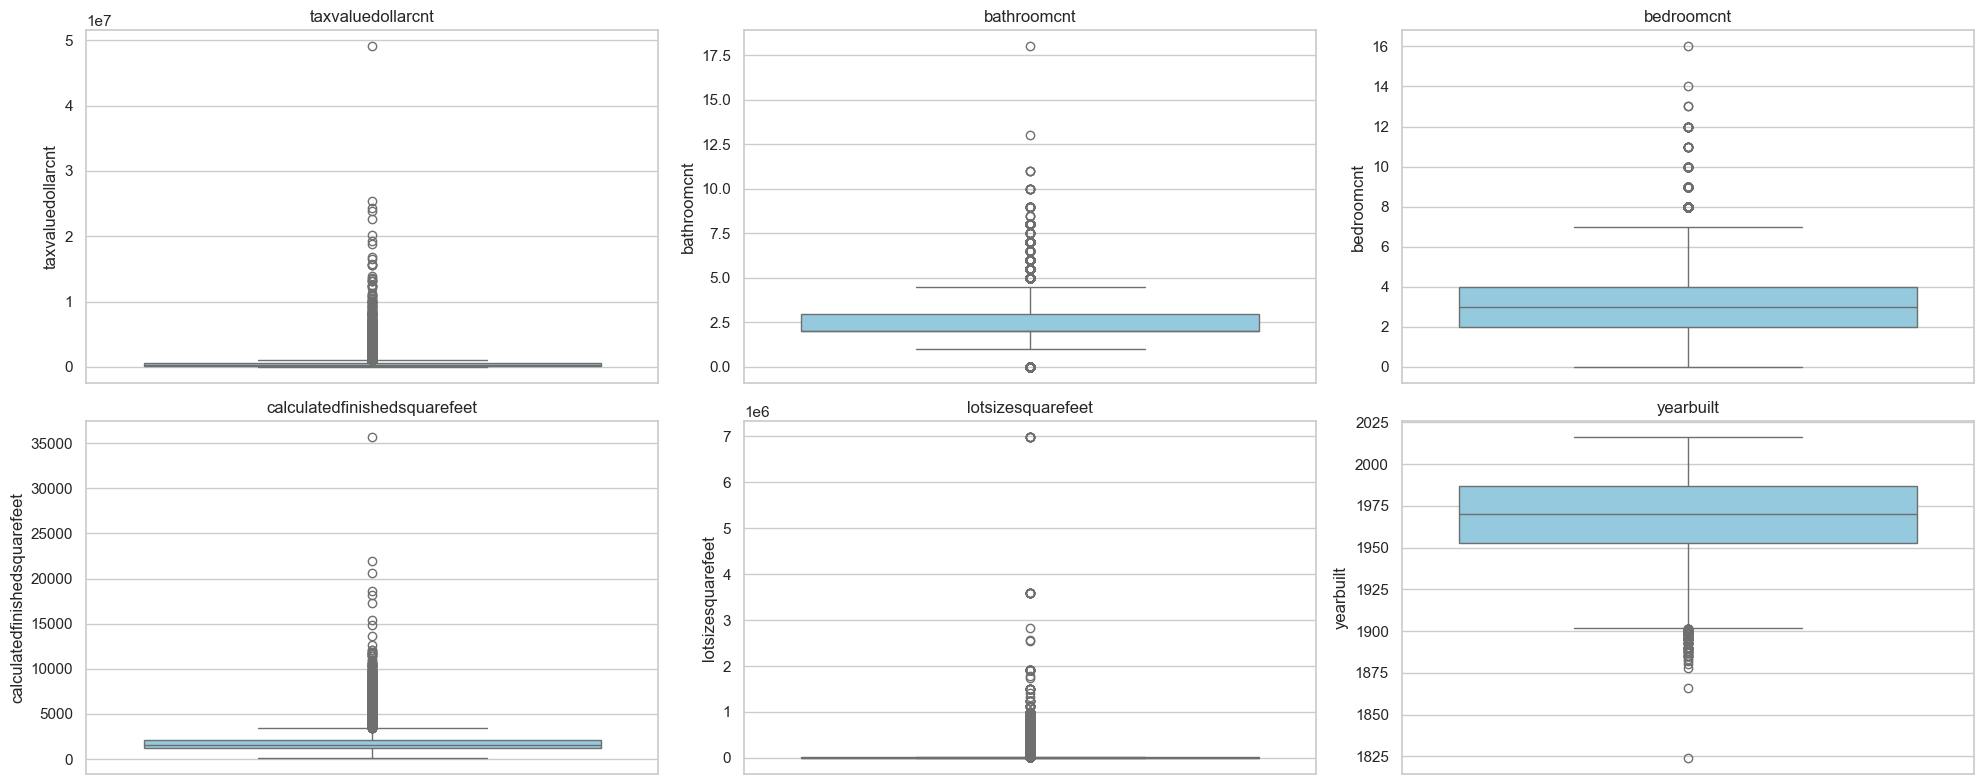

In [ ]:
numeric_cols = [
    "taxvaluedollarcnt", "bathroomcnt", "bedroomcnt",
    "calculatedfinishedsquarefeet", "lotsizesquarefeet", "yearbuilt"
]

plt.figure(figsize=(20, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of plots
    sns.boxplot(y=df2[col], color="skyblue")  # vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()


##### Outlier Summary

In [26]:
def summarize_outliers(df: pd.DataFrame) -> pd.DataFrame:
    cols = [
        "taxvaluedollarcnt",
        "bathroomcnt",
        "bedroomcnt",
        "calculatedfinishedsquarefeet",
        "lotsizesquarefeet",
        "yearbuilt"
    ]
    
    rows = []
    for col in cols:
        if col not in df.columns:
            continue
        s = df[col].dropna()
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
        outlier_mask = (s < lower) | (s > upper)

        rows.append({
            "column": col,
            "count": len(s),
            "mean": s.mean(),
            "median": s.median(),
            "std": s.std(),
            "min": s.min(),
            "q1": q1,
            "q3": q3,
            "iqr": iqr,
            "lower_fence": lower,
            "upper_fence": upper,
            "max": s.max(),
            "p90": s.quantile(0.90),
            "p95": s.quantile(0.95),
            "p99": s.quantile(0.99),
            "skew": s.skew(),
            "n_outliers": outlier_mask.sum(),
            "pct_outliers": round(100 * outlier_mask.mean(), 2),
            "n_zeros": (s == 0).sum(),
            "pct_zeros": round(100 * (s == 0).mean(), 2),
            "unique": s.nunique()
        })
    
    return pd.DataFrame(rows)

# Run it
summary_df = summarize_outliers(df2)
summary_df


,column,count,mean,median,std,min,q1,q3,iqr,lower_fence,...,max,p90,p95,p99,skew,n_outliers,pct_outliers,n_zeros,pct_zeros,unique
0,taxvaluedollarcnt,77578,"490,150.59","358,878.50","653,797.86","1,000.00","206,898.50","569,000.00","362,101.50","-336,253.75",...,"49,061,236.00","904,278.20","1,290,000.00","2,758,771.31",14.43,5186,6.68,0,0.00,50949
1,bathroomcnt,77578,2.30,2.00,1.00,0.00,2.00,3.00,1.00,0.50,...,18.00,3.00,4.00,5.50,1.29,2591,3.34,599,0.77,22
2,bedroomcnt,77578,3.05,3.00,1.14,0.00,2.00,4.00,2.00,-1.00,...,16.00,4.00,5.00,6.00,0.77,383,0.49,837,1.08,16
3,calculatedfinishedsquarefeet,77578,"1,784.31","1,542.00",953.10,128.00,"1,183.00","2,110.00",927.00,-207.50,...,"35,640.00","2,921.30","3,539.00","5,121.46",3.30,4029,5.19,0,0.00,4972
4,lotsizesquarefeet,77578,"27,550.19","7,206.00","116,769.71",236.00,"5,950.00","10,515.75","4,565.75",-898.62,...,"6,971,010.00","40,372.30","109,831.90","443,984.00",26.52,13192,17.00,0,0.00,18848
5,yearbuilt,77578,"1,968.62","1,970.00",23.75,"1,824.00","1,953.00","1,987.00",34.00,"1,902.00",...,"2,016.00","2,001.00","2,006.00","2,012.00",-0.31,113,0.15,0,0.00,136


- **`taxvaluedollarcnt` (Property Value)**  
  - Median ≈ **$358k**, 95th percentile ≈ **$1.29M**, 99th ≈ **$2.76M**.  
  - About **6.7%** flagged as outliers, driven by luxury estates.  
  - Plan: Apply log transform to reduce skew but keep luxury properties.  

- **`bathroomcnt`**  
  - Median = **2**, 95% of homes ≤ **4**, 99% ≤ **5.5**.  
  - About **3.3%** outliers; ~**0.8%** of rows show **0 bathrooms** → drop as invalid.  
  - High counts (6–8) are valid; keep.  

- **`bedroomcnt`**  
  - Median = **3**, 95% of homes ≤ **5**, 99% ≤ **6**.  
  - Only **0.5%** outliers; ~**1%** of rows have **0 bedrooms** → drop as invalid.  
  - Very high values (>10) are rare luxury, keep.  

- **`calculatedfinishedsquarefeet` (Living Area)**  
  - Median ≈ **1,542 sqft**, 95% ≤ **3,539**, 99% ≤ **5,121**.  
  - About **5.2%** outliers; long tail above 20k sqft.  
  - Plan: Keep but apply log transform to reduce skew.  

- **`lotsizesquarefeet` (Lot Size)**  
  - Median ≈ **7,200 sqft**, 95% ≤ **110k**, 99% ≤ **444k**.  
  - Heavy-tailed: ~**17%** flagged as outliers, some >1M likely farms/miscoded.  
  - Plan: Cap extreme values at practical threshold.  

- **`yearbuilt`**  
  - Median = **1970**, 95% ≤ **2006**, 99% ≤ **2012**.  
  - Very few (<0.2%) flagged as outliers (<1900).  
  - Rare but valid historical homes → keep.  

 **Remove invalid entries** (0 beds/baths), **retain valid luxury/historical homes**, and apply **transformations/caps** to stabilize skew for modeling.


##### Outlier Cleanup

In [27]:
df3 = df2.copy()

# Drop invalid zeros (bathrooms and bedrooms)
rows_before = df3.shape[0]
df3 = df3[(df3["bathroomcnt"] > 0) & (df3["bedroomcnt"] > 0)]
rows_after = df3.shape[0]
print(f"Dropped {rows_before - rows_after} rows with 0 bathrooms/bedrooms.")

# Cap extreme lot sizes (at 99th percentile)
lot_cap = df3["lotsizesquarefeet"].quantile(0.99)
df3["lotsizesquarefeet"] = df3["lotsizesquarefeet"].clip(upper=lot_cap)
print(f"Capped 'lotsizesquarefeet' at {lot_cap:,.0f} sqft.")


Dropped 855 rows with 0 bathrooms/bedrooms.
Capped 'lotsizesquarefeet' at 443,769 sqft.



- Dropped invalid values: 0 bathrooms/bedrooms.  
- Capped miscoded lot sizes at the 99th percentile (~443k sqft).  
- Kept rare but valid luxury properties (10+ bathrooms, >20k sqft homes, >$10M values).  
- Kept historical properties (<1900 build year).  
- Will apply log transforms to skewed variables (`taxvaluedollarcnt`, `calculatedfinishedsquarefeet`) in the **Feature Engineering** phase.  



### **6. Exploratory Visuals**

##### Correlation Heatmap


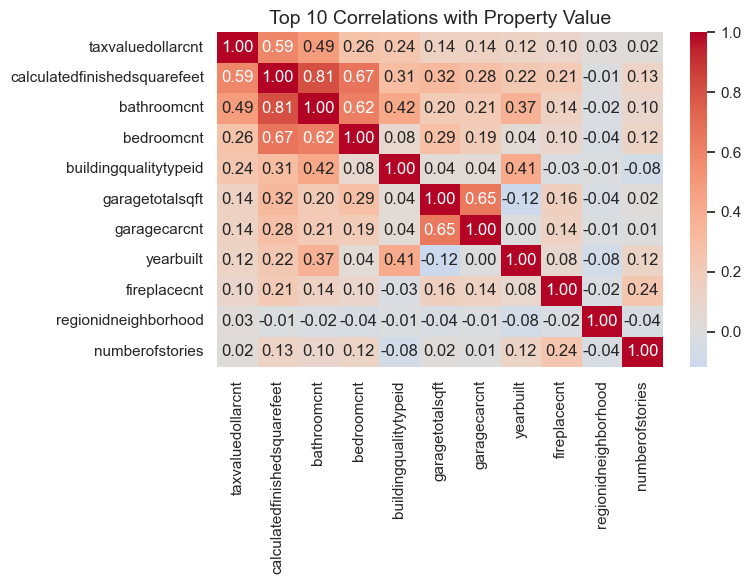

Top correlations with taxvaluedollarcnt:
taxvaluedollarcnt              1.00
calculatedfinishedsquarefeet   0.59
bathroomcnt                    0.49
bedroomcnt                     0.26
buildingqualitytypeid          0.24
garagetotalsqft                0.14
garagecarcnt                   0.14
yearbuilt                      0.12
fireplacecnt                   0.10
regionidneighborhood           0.03
numberofstories                0.02
Name: taxvaluedollarcnt, dtype: float64


In [ ]:
# Select numeric features only
numeric_df = df3.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr = numeric_df.corr()

# Top 10 correlations with target (including target itself)
target_corr = corr["taxvaluedollarcnt"].sort_values(ascending=False).head(11)
top_features = target_corr.index.tolist()

# Plot heatmap for top 10
plt.figure(figsize=(8,6))
sns.heatmap(corr.loc[top_features, top_features],
            cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Top 10 Correlations with Property Value", fontsize=14)

# Save to reports/figures
fig_dir = "../reports/figures"
os.makedirs(fig_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "heatmap_top10.png"), dpi=200, bbox_inches="tight")
plt.show()

print("Top correlations with taxvaluedollarcnt:")
print(target_corr)

- **Strongest drivers of property value (`taxvaluedollarcnt`)**:  
  - `calculatedfinishedsquarefeet` (0.59) → larger homes strongly increase value.  
  - `bathroomcnt` (0.49) → more bathrooms correlate with higher value.  
  - `bedroomcnt` (0.26) and `buildingqualitytypeid` (0.24) also show moderate effects.  

- **Secondary features**:  
  - `garagetotalsqft` (0.14), `garagecarcnt` (0.14), `yearbuilt` (0.12), and `fireplacecnt` (0.10).  
  - These add smaller predictive power but still carry meaningful signals.  

- **Weak features**:  
  - Location variables such as `regionidneighborhood` (0.03) show very low correlation in this dataset, though external neighborhood data could strengthen them.  

Home size (sqft, bathrooms, bedrooms) and building quality are the most important features driving property value, while garages, year built, and fireplaces add secondary signals. Location in this dataset is weak but may improve with richer external data.


##### Scatterplots

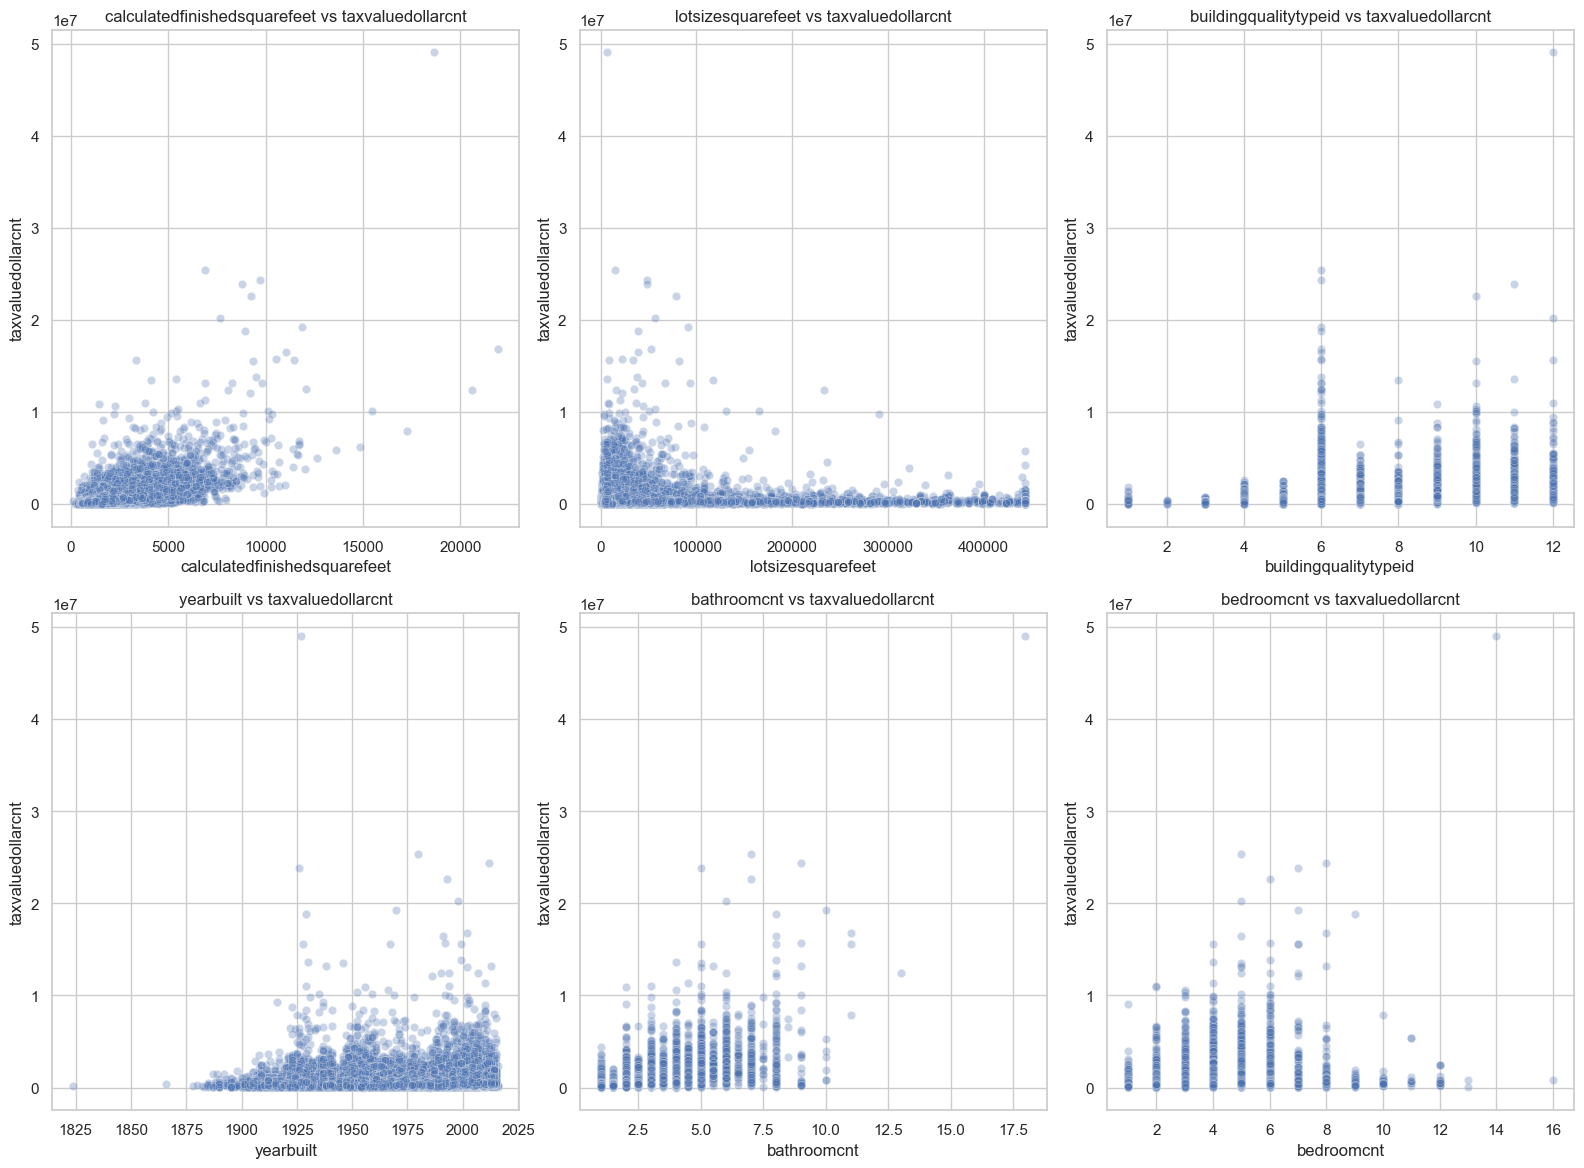

In [ ]:
scatterplot_features = [
    "calculatedfinishedsquarefeet", 
    "lotsizesquarefeet", 
    "buildingqualitytypeid",
    "yearbuilt", 
    "bathroomcnt", 
    "bedroomcnt"
]

# Plot grid of scatterplots
plt.figure(figsize=(16,12))
for i, col in enumerate(scatterplot_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df3[col], y=df3["taxvaluedollarcnt"], alpha=0.3)
    plt.title(f"{col} vs taxvaluedollarcnt")

plt.tight_layout()

# Save to reports/figures 
fig_dir = "../reports/figures"
os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "scatterplots.png"), dpi=200, bbox_inches="tight")

plt.show()


- **Finished sqft (`calculatedfinishedsquarefeet`)**: Larger homes → higher values. Diminishing returns after ~5,000 sqft; luxury estates spread wider.  
- **Lot size (`lotsizesquarefeet`)**: Weak signal; very dispersed. Large lots don’t consistently raise values → lot size not a strong predictor.  
- **Building quality (`buildingqualitytypeid`)**: Higher quality ratings link to higher values. Distinct clusters reflect categorical scoring.  
- **Year built (`yearbuilt`)**: Newer homes trend slightly higher, but effect is modest. Historical homes (<1900) rare but valid.  
- **Bathrooms (`bathroomcnt`)**: More bathrooms → higher values, but effect levels off after ~6.  
- **Bedrooms (`bedroomcnt`)**: More bedrooms → higher values up to ~6. Beyond that, little added effect; valid luxury outliers exist.  

Home size (sqft, bathrooms, bedrooms) and quality are the clearest value drivers. Lot size and year built add weaker signals, while luxury and historical properties behave differently but remain valid.


##### Histograms

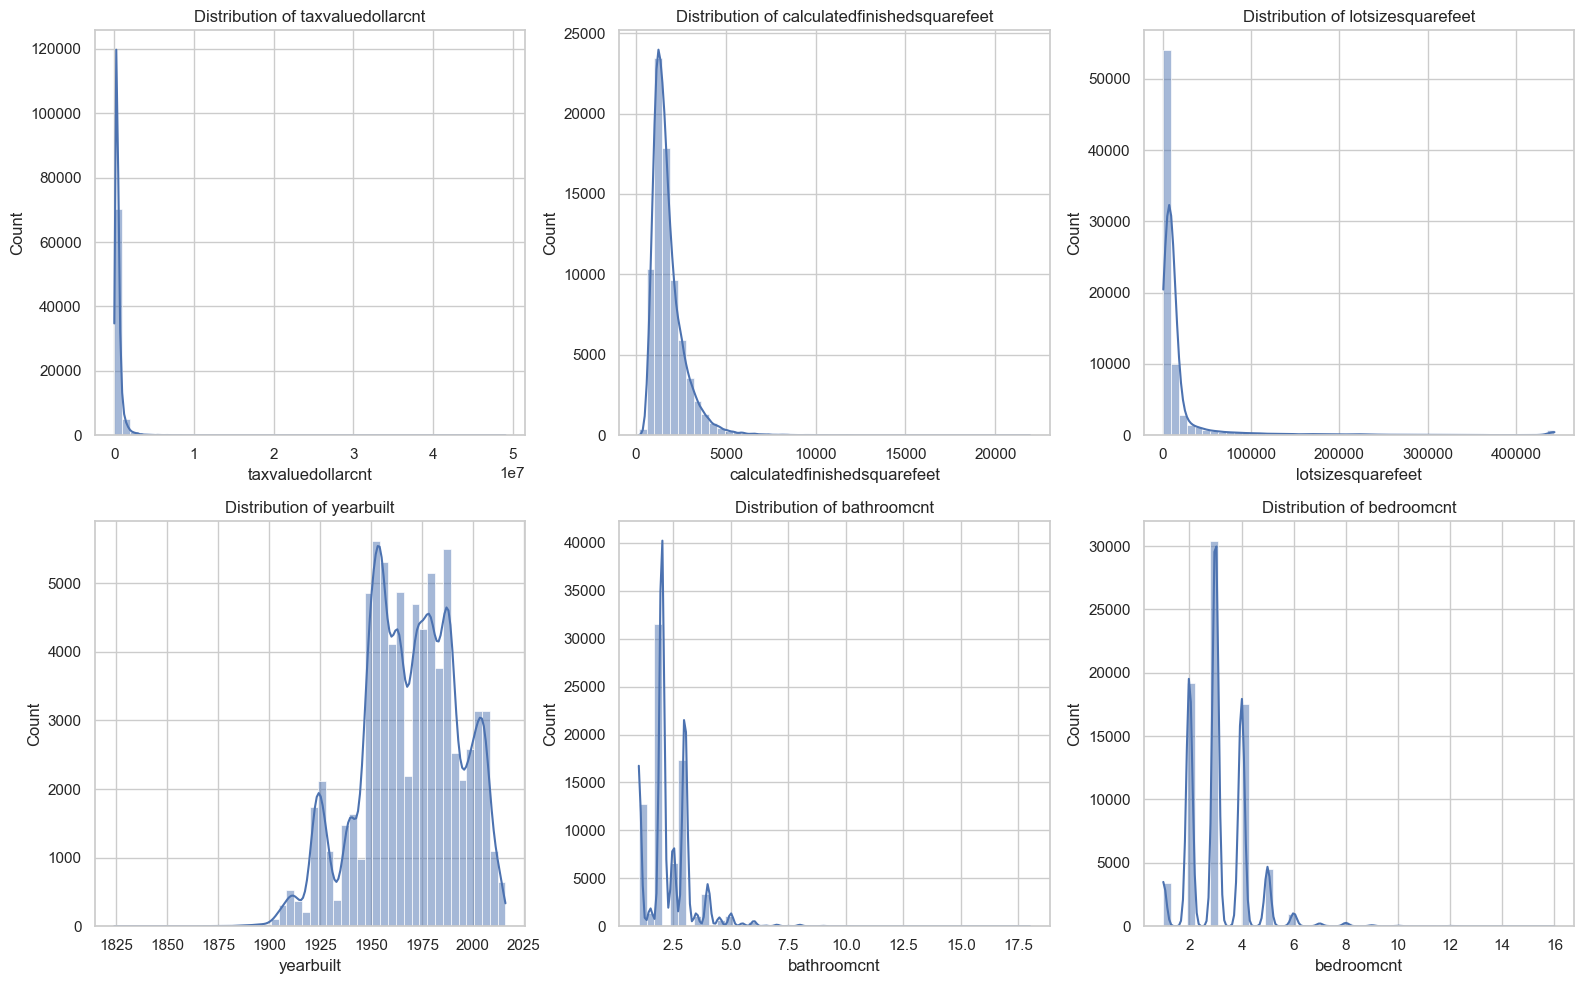

In [ ]:
histogram_features = [
    "taxvaluedollarcnt",
    "calculatedfinishedsquarefeet",
    "lotsizesquarefeet",
    "yearbuilt",
    "bathroomcnt",
    "bedroomcnt"
]

# Plot grid of histograms
plt.figure(figsize=(16,10))
for i, col in enumerate(histogram_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df3[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()

# Save to reports/figures
fig_dir = "../reports/figures"
os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "histograms.png"), dpi=200, bbox_inches="tight")

plt.show()

- **Finished sqft (`calculatedfinishedsquarefeet`)**: Right-skewed, most homes <3,500 sqft; rare luxury estates >20k sqft. Confirms need for log transform.  
- **Lot size (`lotsizesquarefeet`)**: Extremely right-skewed; majority <50k sqft, with rare parcels >400k sqft. Our earlier capping decision is validated.  
- **Building quality (`buildingqualitytypeid`)**: Clustered at specific IDs (e.g., 4–8). Categorical in nature; higher ratings tend to be linked with higher value.  
- **Year built (`yearbuilt`)**: Peaks around the post-1950 housing boom. Few but valid historical properties (<1900).  
- **Bathrooms (`bathroomcnt`)**: Most homes have 2–4 bathrooms. Long right tail for luxury properties with 7+ bathrooms.  
- **Bedrooms (`bedroomcnt`)**: Majority fall within 2–5 bedrooms. Outliers (>10) are rare luxury estates.  

Distributions confirm skew in key features (sqft, lot size, value) that will require log transformation, while categorical features (building quality) and discrete counts (beds, baths) behave as expected.


### **7. Save Cleaned Dataset**

In [ ]:
print("Current working directory:", os.getcwd())

Current working directory: c:\Career\zillow-property-prediction\notebooks


In [ ]:
cleaned_path = "../data/zillow_cleaned.csv"
df3.to_csv(cleaned_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_path}")
print(f"Final shape: {df3.shape}")


Cleaned dataset saved to: ../data/zillow_cleaned.csv
Final shape: (76723, 26)


### **8. Key Insights**

- Exported the cleaned dataset (`zillow_cleaned.csv`) for reuse in Feature Engineering and Modeling.  
- Final dataset shape: **76,723 rows × 26 features** (after dropping sparse columns, invalid rows, and capping lot sizes).  

EDA Summary: 

- Explored dataset structure (77k rows × 55 columns originally).  
- Handled missing values: dropped 18 sparse features (>95% missing), imputed others.  
- Dropped invalid rows (0 bathrooms/bedrooms).  
- Capped extreme lot sizes at the 99th percentile (~443k sqft).  
- Outlier analysis confirmed that luxury estates and historical homes are valid and kept.  
- Explored distributions → identified skewed variables (`taxvaluedollarcnt`, `sqft`) for future log transform.  
- Correlation + scatterplots → confirmed strongest predictors are **home size, bathrooms, bedrooms, and building quality**.  



## **Appendix 1: Features of the Zillow Dataset**  

0. **parcelid**: Unique identifier for the property parcel.  
1. **airconditioningtypeid**: Identifier for the type of air conditioning installed.  
2. **architecturalstyletypeid**: Identifier for the architectural style of the property.  
3. **basementsqft**: Square footage of the basement.  
4. **bathroomcnt**: Number of bathrooms.  
5. **bedroomcnt**: Number of bedrooms.  
6. **buildingclasstypeid**: Identifier for the building framing type (e.g., wood frame, steel frame).  
7. **buildingqualitytypeid**: Numeric value indicating the quality of the building (higher values often indicate better quality).  
8. **calculatedbathnbr**: Calculated number of bathrooms, including fractional bathrooms.  
9. **decktypeid**: Identifier for the type of deck.  
10. **finishedfloor1squarefeet**: Square footage of the finished area on the first floor.  
11. **calculatedfinishedsquarefeet**: Total finished living area square footage.  
12. **finishedsquarefeet12**: Finished living area square footage.  
13. **finishedsquarefeet13**: Perimeter living area square footage.  
14. **finishedsquarefeet15**: Total area.  
15. **finishedsquarefeet50**: Square footage of the finished area on the upper floors.  
16. **finishedsquarefeet6**: Base unfinished and finished area square footage.  
17. **fips**: Federal Information Processing Standards code, uniquely identifying counties and county equivalents.  
18. **fireplacecnt**: Number of fireplaces.  
19. **fullbathcnt**: Number of full bathrooms.  
20. **garagecarcnt**: Number of cars that can fit in the garage.  
21. **garagetotalsqft**: Total square footage of the garage.  
22. **hashottuborspa**: Indicates if the property has a hot tub or spa.  
23. **heatingorsystemtypeid**: Identifier for the type of heating system.  
24. **latitude**: Latitude coordinate of the property.  
25. **longitude**: Longitude coordinate of the property.  
26. **lotsizesquarefeet**: Lot size in square feet.  
27. **poolcnt**: Number of pools on the property.  
28. **poolsizesum**: Total square footage of all pools.  
29. **pooltypeid10**: Identifier for spa or hot tub.  
30. **pooltypeid2**: Identifier for pool with spa or hot tub.  
31. **pooltypeid7**: Identifier for pool without hot tub or spa.  
32. **propertycountylandusecode**: County land use code for the property.  
33. **propertylandusetypeid**: Identifier for the property land use type.  
34. **propertyzoningdesc**: Description of the property's zoning.  
35. **rawcensustractandblock**: Unprocessed census tract and block identifier.  
36. **regionidcity**: Identifier for the city.  
37. **regionidcounty**: Identifier for the county.  
38. **regionidneighborhood**: Identifier for the neighborhood.  
39. **regionidzip**: Identifier for the ZIP code.  
40. **roomcnt**: Total number of rooms.  
41. **storytypeid**: Identifier for the type of stories in the building (e.g., basement, attic).  
42. **threequarterbathnbr**: Number of 3/4 bathrooms (typically includes a shower but no tub).  
43. **typeconstructiontypeid**: Identifier for the type of construction (e.g., frame, masonry).  
44. **unitcnt**: Number of units in the building (e.g., for multi-family properties).  
45. **yardbuildingsqft17**: Square footage of the 17th yard building (e.g., shed).  
46. **yardbuildingsqft26**: Square footage of the 26th yard building.  
47. **yearbuilt**: Year the property was built.  
48. **numberofstories**: Number of stories in the building.  
49. **fireplaceflag**: Indicates if the property has a fireplace.  
50. **assessmentyear**: Year the property was assessed.  
51. **taxdelinquencyflag**: Indicates whether the property’s taxes are delinquent. Often “Y” if taxes are past due; otherwise null/empty.  
52. **taxdelinquencyyear**: The year in which the property’s taxes became delinquent.  
53. **censustractandblock**: A combined identifier for the property’s census tract and block group (part of the U.S. Census geographic hierarchy).  
54. **taxvaluedollarcnt**: Total assessed value of the property (land plus structure) in dollars.  
